# A basic R notebook

## Loading libraries

In [1]:
library('tidyverse')
library('lubridate')
library('caret')

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



## Reading the train and test data

In [2]:
train = read_csv("train.csv")
test = read_csv("test.csv")

Parsed with column specification:
cols(
  id = col_character(),
  vendor_id = col_integer(),
  pickup_datetime = col_datetime(format = ""),
  dropoff_datetime = col_datetime(format = ""),
  passenger_count = col_integer(),
  pickup_longitude = col_double(),
  pickup_latitude = col_double(),
  dropoff_longitude = col_double(),
  dropoff_latitude = col_double(),
  store_and_fwd_flag = col_character(),
  trip_duration = col_integer()
)
Parsed with column specification:
cols(
  id = col_character(),
  vendor_id = col_integer(),
  pickup_datetime = col_datetime(format = ""),
  passenger_count = col_integer(),
  pickup_longitude = col_double(),
  pickup_latitude = col_double(),
  dropoff_longitude = col_double(),
  dropoff_latitude = col_double(),
  store_and_fwd_flag = col_character()
)


## Understanding the data

In [3]:
head(train)

id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98215,40.76794,-73.96463,40.76560,N,455
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98042,40.73856,-73.99948,40.73115,N,663
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.97903,40.76394,-74.00533,40.71009,N,2124
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01004,40.71997,-74.01227,40.70672,N,429
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97305,40.79321,-73.97292,40.78252,N,435
id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.98286,40.74220,-73.99208,40.74918,N,443


In [4]:
lapply(train,class)

$id
[1] "character"

$vendor_id
[1] "integer"

$pickup_datetime
[1] "POSIXct" "POSIXt" 

$dropoff_datetime
[1] "POSIXct" "POSIXt" 

$passenger_count
[1] "integer"

$pickup_longitude
[1] "numeric"

$pickup_latitude
[1] "numeric"

$dropoff_longitude
[1] "numeric"

$dropoff_latitude
[1] "numeric"

$store_and_fwd_flag
[1] "character"

$trip_duration
[1] "integer"

In [5]:
summary(train$passenger_count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   1.000   1.665   2.000   9.000 

In [6]:
train %>% filter(passenger_count > 1)

id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.98286,40.74220,-73.99208,40.74918,N,443
id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.96902,40.75784,-73.95741,40.76590,N,341
id1299289,2,2016-05-15 11:16:11,2016-05-15 11:34:59,4,-73.99153,40.74944,-73.95654,40.77063,N,1128
id1187965,2,2016-02-19 09:52:46,2016-02-19 10:11:20,2,-73.96298,40.75668,-73.98441,40.76072,N,1114
id3075902,2,2016-05-10 19:27:38,2016-05-10 19:44:40,2,-74.00550,40.70659,-73.98582,40.74420,N,1022
id1870624,1,2016-01-05 15:29:54,2016-01-05 15:39:07,3,-73.95152,40.77025,-73.95853,40.76152,N,553
id3323083,1,2016-05-27 14:26:12,2016-05-27 14:46:01,2,-73.97813,40.75834,-73.99225,40.73054,N,1189
id0578558,1,2016-04-21 21:28:27,2016-04-21 21:52:37,2,-73.98855,40.74598,-73.97089,40.79338,N,1450
id2573056,2,2016-04-14 13:27:52,2016-04-14 13:46:14,2,-73.97472,40.75114,-73.95444,40.76412,N,1102
id2391523,1,2016-05-18 21:50:24,2016-05-18 22:10:41,3,-73.96616,40.76691,-73.99218,40.72582,N,1217


In [7]:
summary(train$trip_duration)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     397     662     959    1075 3526282 

## Modelling a simple Linear Regression

In [8]:
split.train = createDataPartition(y = train$trip_duration, p=0.6)
trainingSet = split.train$Resample1
testSet = -trainingSet

In [9]:
library(broom)
lm.fit = lm(trip_duration~vendor_id+passenger_count+pickup_longitude+pickup_latitude, data = train, subset = trainingSet)
tidy(lm.fit)

term,estimate,std.error,statistic,p.value
(Intercept),360820.40262,7954.620930,45.359849,0.000000e+00
vendor_id,204.69130,9.767508,20.956347,1.735570e-97
passenger_count,14.20274,3.702999,3.835468,1.253340e-04
pickup_longitude,2072.41251,68.906593,30.075678,1.273928e-198
pickup_latitude,-5077.13768,148.921643,-34.092678,1.393407e-254


In [10]:
augment(lm.fit)

Warning message:
“Deprecated: please use `purrr::possibly()` instead”Warning message:
“Deprecated: please use `purrr::possibly()` instead”Warning message:
“Deprecated: please use `purrr::possibly()` instead”Warning message:
“Deprecated: please use `purrr::possibly()` instead”Warning message:
“Deprecated: please use `purrr::possibly()` instead”

.rownames,trip_duration,vendor_id,passenger_count,pickup_longitude,pickup_latitude,.fitted,.se.fit,.resid,.hat,.sigma,.cooksd,.std.resid
2,663,1,1,-73.98042,40.73856,886.0626,7.158393,-223.06257,2.689549e-06,4364.917,1.404797e-09,-0.05110360
4,429,2,1,-74.01004,40.71997,1123.7572,9.104775,-694.75717,4.350978e-06,4364.917,2.204627e-08,-0.15916890
5,435,2,1,-73.97305,40.79321,828.5688,9.703308,-393.56882,4.941834e-06,4364.917,8.035488e-09,-0.09016666
6,443,2,6,-73.98286,40.74220,1138.2699,16.121551,-695.26988,1.364150e-05,4364.917,6.922441e-08,-0.15928710
7,341,1,4,-73.96902,40.75784,854.4276,12.293155,-513.42761,7.931862e-06,4364.917,2.194921e-08,-0.11762650
8,1551,2,1,-73.96928,40.79778,813.1928,10.157550,737.80716,5.415348e-06,4364.917,3.094534e-08,0.16903174
11,1274,2,1,-73.98265,40.76384,957.7905,7.679993,316.20948,3.095780e-06,4364.917,3.249384e-09,0.07244356
13,1114,2,2,-73.96298,40.75668,1049.1079,6.474093,64.89208,2.199917e-06,4364.917,9.724563e-11,0.01486676
16,211,1,1,-73.95551,40.76859,785.2076,7.499613,-574.20764,2.952067e-06,4364.917,1.021751e-08,-0.13155090
18,731,1,1,-73.99426,40.74580,820.6210,7.084384,-89.62100,2.634223e-06,4364.917,2.221022e-10,-0.02053216


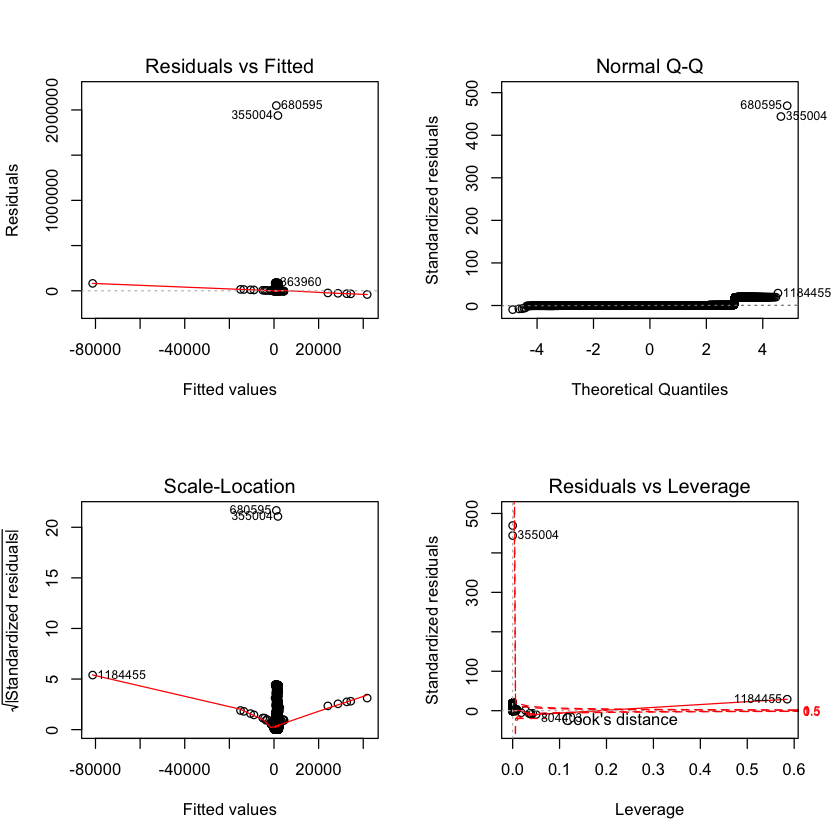

In [11]:
par(mfrow = c(2,2))
plot(lm.fit)